<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/EDA/BlackFridayEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp "/content/drive/MyDrive/kaggle/kaggle.json" ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d sdolezel/black-friday

 93% 7.00M/7.51M [00:00<00:00, 66.7MB/s]
100% 7.51M/7.51M [00:00<00:00, 60.9MB/s]


In [ ]:
! unzip black-friday.zip 

Archive:  black-friday.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [ ]:
df_train = pd.read_csv("train.csv")

In [ ]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
## import test data
df_test = pd.read_csv("test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
# Merge both train and test data

df = df_train.append(df_test)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [ ]:
# Basics
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [ ]:
df.drop(["User_ID"], axis=1, inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Handling Categorical Features

1. Gender

In [ ]:
df.Gender.replace({"F":1, "M":0}, inplace=True)
# another way is
# df.Gender = df.Gender.map({"F":1, "M":0})
# or
# df.Gender = pd.get_dummies(df.Gender, drop_first=1)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


2. Age

In [ ]:
# handling categorical data age

df.Age.unique()



array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
# now we can just do onehotencoding or get_dummies like
pd.get_dummies(df.Age, drop_first=True)

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
233594,0,1,0,0,0,0
233595,0,1,0,0,0,0
233596,0,1,0,0,0,0
233597,0,0,0,1,0,0


We can do this, but just think whether a 10 year old will do more online shopping or a adult (say 30-40 year old), so we can't just blindly put 0 and 1, and instead of doing nominal encoding, let's do ordinal encoding, and give them some ranks, say(1, 2, 3, 4, 5) etc.

In [ ]:
df.Age = df.Age = df.Age.map({"0-17":1, "18-25":2, "26-35":3, "36-45":4, "46-50":6, "55+":7})

In [ ]:
# # we can also do label encoding like
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()

# label_encoder.fit_transform(df.Age)


In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1.0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1.0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1.0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1.0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7.0,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df_city = pd.get_dummies(df.City_Category, drop_first=True)

In [ ]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [ ]:
df = pd.concat([df, df_city], axis=1)

In [ ]:
df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1.0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1.0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1.0,10,A,2,0,12,NaN,NaN,1422.0,0,0


In [ ]:
df.drop("City_Category", axis=1, inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1.0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1.0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1.0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,7.0,16,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                            54784
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [ ]:
## Focus on replacing missing values
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [ ]:
df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [ ]:
## Replace missing values with mode
df.Product_Category_2.value_counts().head(1)

8.0    91317
Name: Product_Category_2, dtype: int64

In [ ]:
# of
mode2 = df.Product_Category_2.mode()[0]
mode2

8.0

In [ ]:
df.Product_Category_2.fillna(mode2, inplace=True)

In [ ]:
df.isna().sum()

Product_ID                         0
Gender                             0
Age                            54784
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [ ]:
# similarly for cat 3
mode3 = df.Product_Category_3.mode()[0]
df.Product_Category_3.fillna(mode3, inplace=True)

In [ ]:
modeAge = df.Age.mode()[0]
df.Age.fillna(modeAge, inplace=True)

In [ ]:
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [ ]:
df.Product_Category_2.value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [ ]:
df.Product_Category_3.value_counts()

16.0    592278
15.0     39968
14.0     26283
17.0     23818
5.0      23799
8.0      17861
9.0      16532
12.0     13115
13.0      7849
6.0       6888
18.0      6621
4.0       2691
11.0      2585
10.0      2501
3.0        878
Name: Product_Category_3, dtype: int64

In [ ]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df.Stay_In_Current_City_Years.replace({"4+": "4"}, inplace=True)

In [ ]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [ ]:
## convert object into integer
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.astype(int)

In [ ]:
df.B = df.B.astype(int)
df.C = df.C.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 77.7+ MB


In [ ]:
df[df.index.duplicated()]

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,0,6.0,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,0,3.0,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,1,4.0,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,1,4.0,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,1,3.0,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,1,3.0,15,4,1,8,8.0,16.0,NaN,1,0
233595,P00254642,1,3.0,15,4,1,5,8.0,16.0,NaN,1,0
233596,P00031842,1,3.0,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,1,6.0,1,4,0,10,16.0,16.0,NaN,0,1


In [ ]:
## Visualisation
# sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


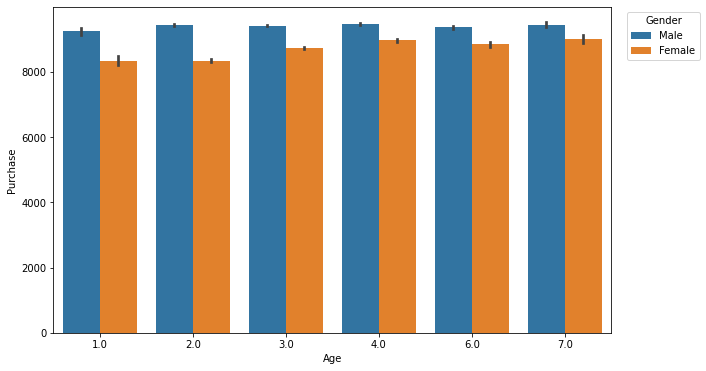

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot("Age", "Purchase", hue="Gender", data=df)
# plt.legend(loc="lower right")
k = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, title="Gender")
k.get_texts()[0].set_text('Male')
k.get_texts()[1].set_text('Female')
plt.show()

# Observation
1. Purchasing of men is higher then women.

In [ ]:
np.sort(df.Occupation.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


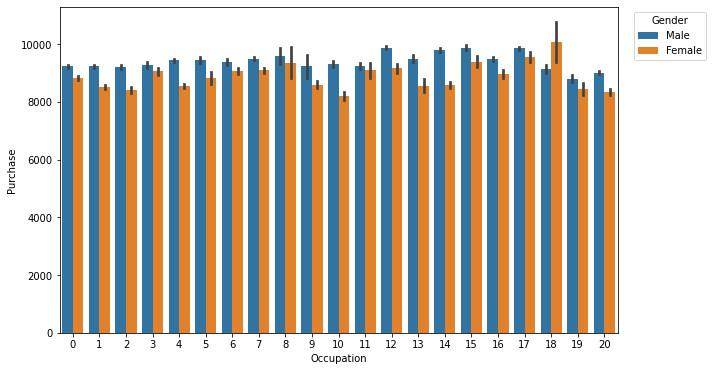

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot("Occupation", "Purchase", hue="Gender", data=df)
k = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, title="Gender")
k.get_texts()[0].set_text('Male')
k.get_texts()[1].set_text('Female')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


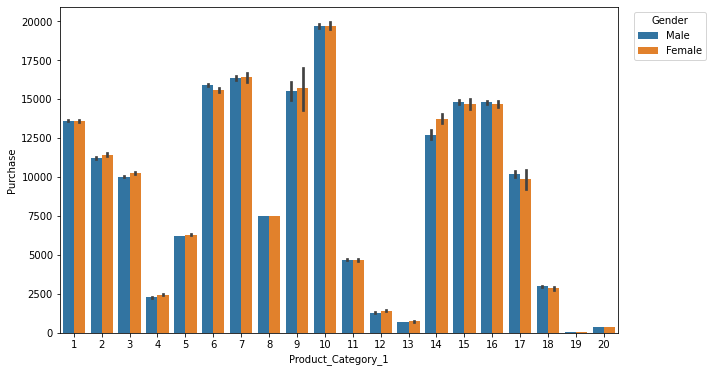

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot("Product_Category_1", "Purchase", hue="Gender", data=df)
k = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, title="Gender")
k.get_texts()[0].set_text('Male')
k.get_texts()[1].set_text('Female')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


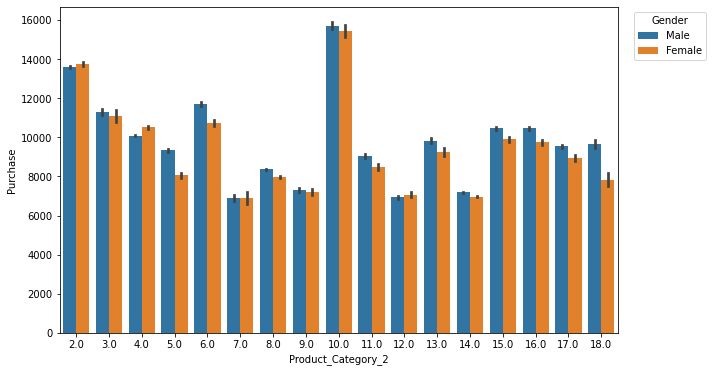

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot("Product_Category_2", "Purchase", hue="Gender", data=df)
k = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, title="Gender")
k.get_texts()[0].set_text('Male')
k.get_texts()[1].set_text('Female')
plt.show()

# Feature Scaling

In [ ]:
df_train = df[~df.Purchase.isnull()]

In [ ]:
df_test = df[df.Purchase.isnull()]

In [ ]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [ ]:
X = df_train.drop(columns=["Purchase", "Product_ID"])
y = df_train.iloc[:,-3].values

In [ ]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1,1.0,10,2,0,3,8.0,16.0,0,0
1,1,1.0,10,2,0,1,6.0,14.0,0,0
2,1,1.0,10,2,0,12,8.0,16.0,0,0
3,1,1.0,10,2,0,12,14.0,16.0,0,0
4,0,7.0,16,4,0,8,8.0,16.0,0,1


In [ ]:
y[:5]

array([ 8370., 15200.,  1422.,  1057.,  7969.])

In [ ]:
X.shape, y.shape

((550068, 10), (550068,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.isna().sum()

Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
B                             0
C                             0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.57141282, -1.04146013,  0.90867822, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-0.57141282, -0.28123163, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       [-0.57141282,  0.47899687,  1.36872445, ..., -1.09182956,
        -0.85056064,  1.48627336],
       ...,
       [ 1.75004823, -1.04146013, -1.08485545, ...,  0.36891877,
         1.17569512, -0.67282374],
       [ 1.75004823, -1.04146013, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374],
       [ 1.75004823, -1.04146013, -0.93150671, ...,  0.36891877,
        -0.85056064, -0.67282374]])

In [ ]:
X_test

array([[-0.57141282, -0.28123163,  1.67542193, ...,  0.36891877,
        -0.85056064,  1.48627336],
       [ 1.75004823,  0.47899687,  0.44863199, ...,  0.36891877,
         1.17569512, -0.67282374],
       [ 1.75004823,  0.47899687, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       ...,
       [-0.57141282, -1.04146013, -0.93150671, ...,  0.36891877,
        -0.85056064,  1.48627336],
       [-0.57141282,  0.47899687, -0.16476299, ...,  0.00373169,
        -0.85056064,  1.48627336],
       [-0.57141282, -1.04146013, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374]])

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lr = LinearRegression()
la = Lasso()
ri = Ridge()

In [ ]:
lr.fit(X_train, y_train)
la.fit(X_train, y_train)
ri.fit(X_train, y_train)

Ridge()

In [ ]:
y_predlr = lr.predict(X_test)
y_predla = la.predict(X_test)
y_predri = ri.predict(X_test)

In [ ]:
y_predlr[:5]

array([11495.19789249, 10439.7284788 ,  7363.1018497 , 10603.56050358,
        8728.19970465])

In [ ]:
y_test[:5]

array([19142., 15513.,  7802., 15455.,  4492.])

# Model Building

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Linear Regression", mean_absolute_error(y_predlr, y_test))
print("Lasso Regression", mean_absolute_error(y_predla, y_test))
print("Ridge Regression", mean_absolute_error(y_predri, y_test))

Linear Regression 3577.9975277412236
Lasso Regression 3578.072865423992
Ridge Regression 3577.998160948122


In [ ]:
# from sklearn.svm import SVR
# regressor = SVR(kernel = 'rbf')
# regressor.fit(X_train, y_train)
# y_pred_svr = regressor.predict(X_test)
# mean_absolute_error(y_pred_svr, y_test)